# W&B (Weights and Biases) Tutorial [(Link)](https://wandb.ai/site)
* Author: [안재한](https://github.com/Dev-Jahn)

[<img src="https://drive.google.com/uc?export=view&id=12X8w2gmCa2N5i9cJ5mIJaNVSJpvcFJXH"/>](https://www.youtube.com/watch?v=krWjJcW80_A)
## 계정 생성하기
***
* Github
* Google
* MS
* 자체 계정

## 기능들
***
<img src="https://drive.google.com/uc?export=view&id=1Vwp_INLmNsi0Blxv7oBjIeRlC0E78EIv"/>
* 다양한 형태의 학습 트래킹 (성능지표, 이미지, 자연어, 오디오, 비디오, 3D 모델...etc)
* 리포트 생성
* 데이터셋, 모델 버전 관리
* 테이블을 이용한 데이터 시각화
* 하이퍼파라미터 튜닝
* 모델 저장 및 배포

## Documentation
***
근래들어 활발하게 기능이 개발되는 중이라 문서화가 잘 되어 있는 편
* [공식 Documentation](https://docs.wandb.ai/?_gl=1*1ffsiro*_ga*MTMwMjc3MzA0LjE2NzIzMzQ3NDc.*_ga_JH1SJHJQXJ*MTY3MjMzNDc0Ny4xLjEuMTY3MjMzNDg3Mi40NS4wLjA.)
    * [실험 추적 기능(로깅)](https://docs.wandb.ai/guides/track)
    * [하이퍼파라미터 튜닝](https://docs.wandb.ai/guides/sweeps)
    * [데이터, 모델 버전 관리](https://docs.wandb.ai/guides/data-and-model-versioning)
    * [모델 라이프사이클 관리](https://docs.wandb.ai/guides/models)
    * [데이터 시각화](https://docs.wandb.ai/guides/data-vis)
    * [리포트 생성하기](https://docs.wandb.ai/guides/reports)
    * [Pytorch, Keras, Hugging Face 등과 연동하기](https://docs.wandb.ai/guides/integrations)
* [파이썬 레퍼런스(모듈, 함수 명세)](https://docs.wandb.ai/ref/python)
    
## Forum
***
모르는 게 있으면 [Forum](https://community.wandb.ai/?_gl=1*kvghcf*_ga*MTMwMjc3MzA0LjE2NzIzMzQ3NDc.*_ga_JH1SJHJQXJ*MTY3MjMzNDc0Ny4xLjEuMTY3MjMzNDk0Ny41OC4wLjA.)에 질문해도 됩니다

## 기본 구조
***
<img src="https://drive.google.com/uc?export=view&id=1eSuLm2IGUub2QyMwapabyejDfNFjvSz7"/>

프로젝트를 생성하고 로깅을 시작하면, 각 프로젝트 내에 run이라는 형태로 일련의 기록들이 저장됨

## 시작하기
***
[[링크]](https://wandb.ai/quickstart) 에서 `Your API key` 클릭하여 복사해두기

In [3]:
!pip install wandb
!wandb login
# 이후 방금 복사한 key입력

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
^C

Aborted!


`로그인에 대한 정보는 컴퓨터에 파일로 기록되므로 한번 로그인해두면 같은 기기에서는 다시 할 필요 없습니다`

In [ ]:
import wandb

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-10",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = epoch*10
    loss = 1/epoch
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

## 학습, 평가 메트릭 기록하기
***

In [5]:
import wandb
import torch
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.models import resnet18
from tqdm.auto import tqdm, trange

EPOCH = 100
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

In [2]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# 학습 준비
trainset = CIFAR10('~/data', train=True, transform=ToTensor(), download=True)
testset = CIFAR10('~/data', train=False, transform=ToTensor(), download=True)
# trainset = CIFAR10('/content', train=True, transform=ToTensor(), download=True)
# testset = CIFAR10('/content', train=False, transform=ToTensor(), download=True)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
model = resnet18(num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

avg_train_acc = AverageMeter()
avg_train_loss = AverageMeter()
avg_test_acc = AverageMeter()
avg_test_loss = AverageMeter()

Files already downloaded and verified
Files already downloaded and verified


In [37]:
# 학습 시작
########## Code here ###########
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-10",
    "epochs": 10,
    }
)

################################

for e in trange(EPOCH):
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        pred = model(data.cuda())
        loss = F.cross_entropy(pred, target.cuda())
        loss.backward()
        optimizer.step()
        ########## Code here ###########
        pred_labels = torch.argmax(pred, dim=1).detach().cpu().numpy()
        acc = accuracy_score(target.numpy(), pred_labels)
        avg_train_acc.update(acc, n=len(data))
        avg_train_loss.update(loss.item())
        ################################
    model.eval()
    for data, target in testloader:
        pred = model(data.cuda())
        loss = F.cross_entropy(pred, target.cuda())
        ########## Code here ###########
        pred_labels = torch.argmax(pred, dim=1).detach().cpu().numpy()
        acc = accuracy_score(target.numpy(), pred_labels)
        avg_test_acc.update(acc, n=len(data))
        avg_test_loss.update(loss.item())
        ################################
    ########## Code here ###########
    wandb.log({
        'train_acc':avg_train_acc.avg,
        'train_loss':avg_train_loss.avg,
        'test_acc':avg_test_acc.avg,
        'test_loss':avg_test_loss.avg,
    })
    ################################
wandb.finish()

  0%|          | 0/100 [00:00<?, ?it/s]

test_acc,▁▄▅▆▇▇▇▇▇▇▇▇████████████████████████████
test_loss,█▃▂▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅
train_acc,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████████████
train_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,0.76173
test_loss,1.34174
train_acc,0.96575
train_loss,0.09932


## 학습중 이미지 업로드
***
Vision 관련 딥러닝 모델들을 학습할 때는 정확도, loss값등 단순 수치보다 시각적으로 진척을 확인해야 할 때가 많음
* 모델이 이미지에서 올바른 특징들을 잡아내고 있는지
* 객체탐지를 잘하는지
* segmentation이 정상적으로 되는지

등 을 실시간으로 확인할 수 있어야 학습 잘못 돌려놓고 며칠뒤에 깨닫는 일이 없음...

* 라이브러리 제공 이미지 객체 사용(`torchvision` `make_grid` 등 사용시)
```python
images = wandb.Image(image_array, caption="Top: Output, Bottom: Input")
wandb.log({"examples": images}
```


* numpy array 사용
```python
images = [PIL.Image.fromarray(image) for image in image_array]
wandb.log({"examples": [wandb.Image(image) for image in images]}
```


* 파일 직접 업로드
```python
im = PIL.fromarray(...)
rgb_im = im.convert('RGB')
rgb_im.save('myimage.jpg')
wandb.log({"example": wandb.Image("myimage.jpg")})
```

*Note: 스텝 당 50장 이상의 이미지를 로깅하면 코드의 성능이 심각하게 저하될 수 있습니다.*

In [3]:
import PIL
from torchvision.transforms import ToPILImage

In [ ]:
model(data)

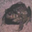

In [10]:
ToPILImage()(data[0])

In [6]:
# 학습 시작
########## Code here ###########
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-10",
    "epochs": 10,
    }
)

################################

for e in trange(EPOCH):
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        pred = model(data.cuda())
        loss = F.cross_entropy(pred, target.cuda())
        loss.backward()
        optimizer.step()
    model.eval()
    for data, target in testloader:
        pred = model(data.cuda())
        loss = F.cross_entropy(pred, target.cuda())
        ########## Code here ###########
        pred_labels = torch.argmax(pred, dim=1).detach().cpu().numpy()
        real_labels = target.numpy()
        images = [ToPILImage()(image) for image in data]
        # wandb.Image() 함수의 인자로 caption을 추가해서 예측 레이블과 실제 레이블을 표시해주기
        # Hint. for image, pred, real in zip(images, pred_labels, real_labels)
        # List comprehension으로 wandb.Image 객체들을 리스트 형태로 딕셔너리 안에 넣어주기
        wandb.log({
            "test predictions": [
                wandb.Image(
                    image, caption=f'Real: {real} Pred: {pred}'
                ) for image, pred, real in zip(images, pred_labels, real_labels)]
        })
        ################################
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dev-jahn (iislab-official). Use `wandb login --relogin` to force relogin


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

좀 더 고급지게 사용하면..

<img src="https://1039519455-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-Lqya5RvLedGEWPhtkjU%2F-M61xdWuQbgg6aVeX07a%2F-M61yg5EmBq-8JWuy3bG%2Fsemantic%20segmentation.gif?alt=media&token=c1229099-b069-4cd7-ab03-331915eb0aa8" width="1000" />

이런 것도 가능

## Table을 이용한 데이터 시각화
***
```python
table = wandb.Table(columns=['ID', 'Image'])

for id, img, label in zip(ids, images, labels):
    mask_img = wandb.Image(img, masks = {
        "prediction" : {
            "mask_data" : label,
            "class_labels" : class_labels
        },
        ...
    })
    
    table.add_data(id, img)

wandb.log({"Table" : table})
```

## 모델 저장, 버전관리 + Netron viewer를 이용한 시각화
***

<img src="https://drive.google.com/uc?export=view&id=19JqSReaU3wMqDSEo7s0d-MkulbCZWafI"/>

### Steps
1. Artifact에 모델파일 업로드
2. model registry에 모델 등록
3. Artifact 탭에서 2에서 등록한 모델 레지스트리에 모델 넣어주기

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/data /content
# 바로가기 추가시 경로를 변경하신분은 MyDrive/data부분을 변경하신 경로로 설정하세요

In [ ]:
#!pip install pytorchyolo
import torch
from pytorchyolo import models
# Load the YOLO model

model = models.load_model(
  "/home/jahn/workspace/tmp/PyTorch-YOLOv3/config/yolov3-tiny.cfg", 
  "/home/jahn/workspace/tmp/PyTorch-YOLOv3/weights/yolov3-tiny.weights")

import wandb
import random
run = wandb.init(project="test")
artifact = wandb.Artifact('Yolo-v3', type='model')
# 학습 하며 여러가지 로깅..
# wandb.log({"acc": 1, "loss": 1})
torch.onnx.export(model, torch.rand((1,3,224,224)).cuda(), 'yolo.onnx')
artifact.add_file(local_path='yolo.onnx')
run.log_artifact(artifact)

*더 알고싶으신 분은 [공식 Artifact 가이드](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/wandb-artifacts/Pipeline_Versioning_with_W%26B_Artifacts.ipynb#scrollTo=6gLwSc1SOajB) 참고*